### Advanced Prophet Models - Modeling Holiday and Other Date Effects

This program builds on the previous activity, and begins the following:

`prophet_prepare_train_data`, `analyze_model_results` & `detecting_changes`

Reads in the CSV of hourly crypto trading data, conducts exploratory data analysis, and builds a forecast model using the Facebook Prophet package. With the model built, creates forecasts for future crypto prices and splits this forecast into various seasonal patterns.

**This program** continues the analysis of hourly crypto trading data, covering some advanced Prophet strategies for making forecasts, by adjusting for holidays or other special date effects.


# (These first steps are from the previous Activity and have already been completed)

In [1]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
from fbprophet import Prophet
import hvplot.pandas
import datetime as dt
%matplotlib inline

### Read in the data to visualize, analyze, and forecast.

In [2]:
# Read csv file as DataFrame, with the first column as row index
data_path = Path("../Resources/bitcoin_hourly.csv")
df = pd.read_csv(data_path, index_col='date', infer_datetime_format=True, parse_dates=True)

# Drop columns that won't be used
df = df.drop('volume', axis=1)

# Preview the dataset
df.head()

close
date                         
2017-08-17 05:00:00   4315.32
2017-08-17 06:00:00   4324.35
2017-08-17 07:00:00   4349.99
2017-08-17 08:00:00   4360.69
2017-08-17 09:00:00   4444.00
2017-08-17 10:00:00   4460.00
2017-08-17 11:00:00   4427.30
2017-08-17 12:00:00   4411.00
2017-08-17 13:00:00   4459.00
2017-08-17 14:00:00   4470.82
2017-08-17 15:00:00   4352.34
2017-08-17 16:00:00   4354.18
2017-08-17 17:00:00   4289.24
2017-08-17 18:00:00   4256.97
2017-08-17 19:00:00   4325.23
2017-08-17 20:00:00   4346.74
2017-08-17 21:00:00   4333.55
2017-08-17 22:00:00   4336.80
2017-08-17 23:00:00   4285.08
2017-08-18 00:00:00   4286.53
2017-08-18 01:00:00   4243.59
2017-08-18 02:00:00   4267.59
2017-08-18 03:00:00   4292.39
2017-08-18 04:00:00   4287.92
2017-08-18 05:00:00   4313.56
2017-08-18 06:00:00   4279.46
2017-08-18 07:00:00   4300.25
2017-08-18 08:00:00   4282.73
2017-08-18 09:00:00   4304.15
2017-08-18 10:00:00   4356.31
...                       ...
2021-02-10 23:00:00  44807.58
2021-02-11 00:00:00  44250.00
2021-02-11 01:00:00  44180.86
2021-02-11 02:00:00  44582.07
2021-02-11 03:00:00  44582.07
2021-02-11 05:00:00  44641.72
2021-02-11 06:00:00  44559.99
2021-02-11 07:00:00  44700.01
2021-02-11 08:00:00  45017.02
2021-02-11 09:00:00  45500.98
2021-02-11 10:00:00  46279.80
2021-02-11 11:00:00  46061.49
2021-02-11 12:00:00  46516.39
2021-02-11 13:00:00  47555.46
2021-02-11 14:00:00  47864.81
2021-02-11 15:00:00  47960.85
2021-02-11 16:00:00  47590.53
2021-02-11 17:00:00  47366.42
2021-02-11 18:00:00  47653.14
2021-02-11 19:00:00  47754.03
2021-02-11 20:00:00  47027.49
2021-02-11 21:00:00  46884.84
2021-02-11 22:00:00  47712.94
2021-02-11 23:00:00  47969.51
2021-02-12 00:00:00  47990.00
2021-02-12 01:00:00  48477.50
2021-02-12 02:00:00  47935.66
2021-02-12 03:00:00  47587.31
2021-02-12 04:00:00  47271.55
2021-02-12 05:00:00  47398.79

[30748 rows x 1 columns]

In [3]:
# Use hvPlot to visually inspect the price data
df['close'].hvplot()

:Curve   [date]   (close)

In [4]:
# Reset the index so that we recode the columns for Prophet
df = df.reset_index()

In [5]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df.columns = ['ds', 'y']

# Drop an NaN values from the prophet_df DataFrame
# mercado_prophet_df = mercado_prophet_df.dropna()

# View dataframe shape, and the first and last five rows of the mercado_prophet_df DataFrame
display(df.shape)
display(df.head())
display(df.tail())

(30748, 2)

ds        y
0 2017-08-17 05:00:00  4315.32
1 2017-08-17 06:00:00  4324.35
2 2017-08-17 07:00:00  4349.99
3 2017-08-17 08:00:00  4360.69
4 2017-08-17 09:00:00  4444.00

ds         y
30743 2021-02-12 01:00:00  48477.50
30744 2021-02-12 02:00:00  47935.66
30745 2021-02-12 03:00:00  47587.31
30746 2021-02-12 04:00:00  47271.55
30747 2021-02-12 05:00:00  47398.79

### Fitting the Model

In [6]:
# Call the Prophet function, store as an object
model = Prophet()
model

In [7]:
# Fit the time-series model.
model.fit(df)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


### Making Model Predictions

In [8]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 1000 hours (approx 40 days)
future_trends = model.make_future_dataframe(periods=1000, freq='H')

# View the last five rows of the predictions
future_trends.tail()

ds
31743 2021-03-25 17:00:00
31744 2021-03-25 18:00:00
31745 2021-03-25 19:00:00
31746 2021-03-25 20:00:00
31747 2021-03-25 21:00:00

In [10]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends = model.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends.head()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0 2017-08-17 05:00:00  5699.139887  3186.625123  5810.043466  5699.139887   
1 2017-08-17 06:00:00  5705.491343  3083.747774  5636.330471  5705.491343   
2 2017-08-17 07:00:00  5711.842800  3150.728644  5672.064950  5711.842800   
3 2017-08-17 08:00:00  5718.194256  3084.406543  5745.055423  5718.194256   
4 2017-08-17 09:00:00  5724.545712  3120.630918  5737.975751  5724.545712   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  5699.139887    -1306.016599          -1306.016599          -1306.016599   
1  5705.491343    -1309.937814          -1309.937814          -1309.937814   
2  5711.842800    -1314.355612          -1314.355612          -1314.355612   
3  5718.194256    -1321.376980          -1321.376980          -1321.376980   
4  5724.545712    -1330.602869          -1330.602869          -1330.602869   

      daily  ...     weekly  weekly_lower  weekly_upper       yearly  \
0 -5.875248  ...  11.510288     11.510288     11.510288 -1311.651639   
1 -4.008520  ...  12.302189     12.302189     12.302189 -1318.231483   
2 -2.468406  ...  12.931890     12.931890     12.931890 -1324.819096   
3 -3.352265  ...  13.389715     13.389715     13.389715 -1331.414430   
4 -6.253794  ...  13.668366     13.668366     13.668366 -1338.017441   

   yearly_lower  yearly_upper  multiplicative_terms  \
0  -1311.651639  -1311.651639                   0.0   
1  -1318.231483  -1318.231483                   0.0   
2  -1324.819096  -1324.819096                   0.0   
3  -1331.414430  -1331.414430                   0.0   
4  -1338.017441  -1338.017441                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                         0.0                         0.0  4393.123288  
1                         0.0                         0.0  4395.553530  
2                         0.0                         0.0  4397.487188  
3                         0.0                         0.0  4396.817275  
4                         0.0                         0.0  4393.942842  

[5 rows x 22 columns]

### Plotting Forecasts

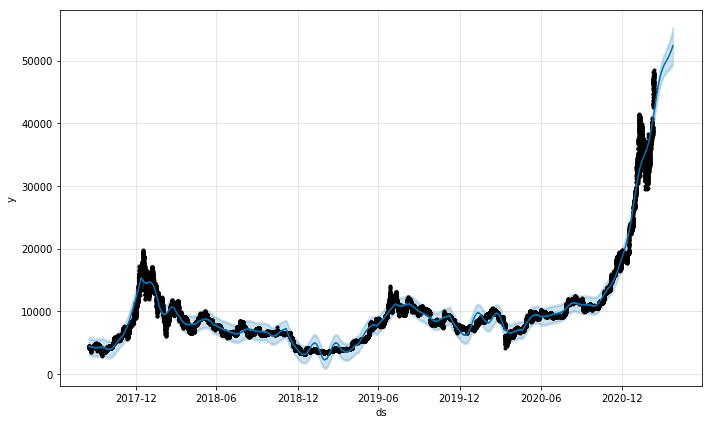

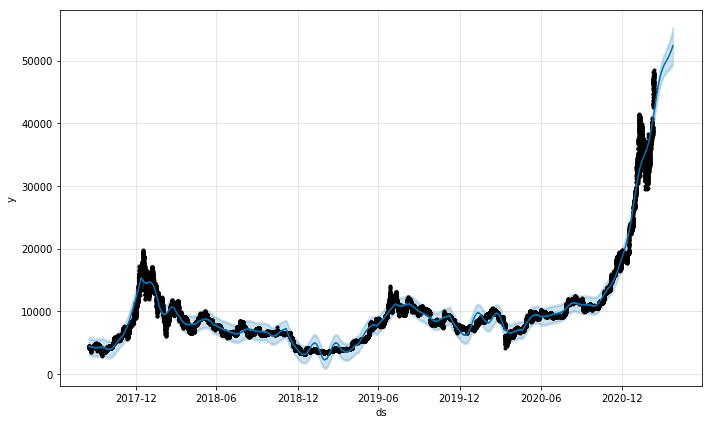

In [11]:
# Plot the Prophet predictions for the Mercado trends data
model.plot(forecast_trends)

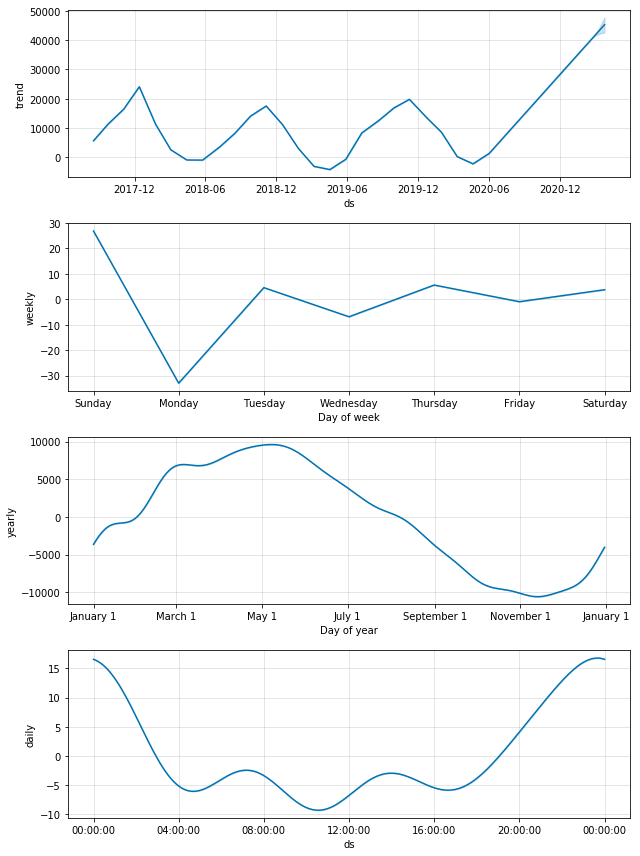

In [12]:
# Use the plot_components function to visualize the forecast results 
figures = model.plot_components(forecast_trends)

### Analyzing Forecasts

In [13]:
# At this point, it's useful to set the `datetime` index of the forecast data.
forecast_trends = forecast_trends.set_index(['ds'])
forecast_trends.head()

trend   yhat_lower   yhat_upper  trend_lower  \
ds                                                                        
2017-08-17 05:00:00  5699.139887  3186.625123  5810.043466  5699.139887   
2017-08-17 06:00:00  5705.491343  3083.747774  5636.330471  5705.491343   
2017-08-17 07:00:00  5711.842800  3150.728644  5672.064950  5711.842800   
2017-08-17 08:00:00  5718.194256  3084.406543  5745.055423  5718.194256   
2017-08-17 09:00:00  5724.545712  3120.630918  5737.975751  5724.545712   

                     trend_upper  additive_terms  additive_terms_lower  \
ds                                                                       
2017-08-17 05:00:00  5699.139887    -1306.016599          -1306.016599   
2017-08-17 06:00:00  5705.491343    -1309.937814          -1309.937814   
2017-08-17 07:00:00  5711.842800    -1314.355612          -1314.355612   
2017-08-17 08:00:00  5718.194256    -1321.376980          -1321.376980   
2017-08-17 09:00:00  5724.545712    -1330.602869          -1330.602869   

                     additive_terms_upper     daily  daily_lower  ...  \
ds                                                                ...   
2017-08-17 05:00:00          -1306.016599 -5.875248    -5.875248  ...   
2017-08-17 06:00:00          -1309.937814 -4.008520    -4.008520  ...   
2017-08-17 07:00:00          -1314.355612 -2.468406    -2.468406  ...   
2017-08-17 08:00:00          -1321.376980 -3.352265    -3.352265  ...   
2017-08-17 09:00:00          -1330.602869 -6.253794    -6.253794  ...   

                        weekly  weekly_lower  weekly_upper       yearly  \
ds                                                                        
2017-08-17 05:00:00  11.510288     11.510288     11.510288 -1311.651639   
2017-08-17 06:00:00  12.302189     12.302189     12.302189 -1318.231483   
2017-08-17 07:00:00  12.931890     12.931890     12.931890 -1324.819096   
2017-08-17 08:00:00  13.389715     13.389715     13.389715 -1331.414430   
2017-08-17 09:00:00  13.668366     13.668366     13.668366 -1338.017441   

                     yearly_lower  yearly_upper  multiplicative_terms  \
ds                                                                      
2017-08-17 05:00:00  -1311.651639  -1311.651639                   0.0   
2017-08-17 06:00:00  -1318.231483  -1318.231483                   0.0   
2017-08-17 07:00:00  -1324.819096  -1324.819096                   0.0   
2017-08-17 08:00:00  -1331.414430  -1331.414430                   0.0   
2017-08-17 09:00:00  -1338.017441  -1338.017441                   0.0   

                     multiplicative_terms_lower  multiplicative_terms_upper  \
ds                                                                            
2017-08-17 05:00:00                         0.0                         0.0   
2017-08-17 06:00:00                         0.0                         0.0   
2017-08-17 07:00:00                         0.0                         0.0   
2017-08-17 08:00:00                         0.0                         0.0   
2017-08-17 09:00:00                         0.0                         0.0   

                            yhat  
ds                                
2017-08-17 05:00:00  4393.123288  
2017-08-17 06:00:00  4395.553530  
2017-08-17 07:00:00  4397.487188  
2017-08-17 08:00:00  4396.817275  
2017-08-17 09:00:00  4393.942842  

[5 rows x 21 columns]

### Testing Upper and Lower ranges of a Forecast 
* `yhat` represents the most likely (average) forecast
* `yhat_lower` and `yhat_upper` represents the worst and best case prediction 
    * (These are based on what are known as 80% confidence intervals).

In [14]:
# From the `forecast_trends` DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 10 days (24*10 = 240) 
forecast_trends[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-240:, :].hvplot()

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

### Narrowing a Forecast to a Specific Date Range

In [15]:
# Produce a forecast for a specific time window

# Create a `forecast_march_2021` Dataframe, which contains just forecasts for that month
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
forecast_march_2021 = forecast_trends.loc['2021-03-01':'2021-03-31'][['yhat_upper', 'yhat_lower', 'yhat']]

# Replace the column names to something less technical sounding
forecast_march_2021 = forecast_march_2021.rename(
    columns={
        'yhat_upper': 'Best Case',
        'yhat_lower':'Worst Case', 
        'yhat':'Most Likely Case'
    }
)

# Review the last five rows of the DataFrame
forecast_march_2021.tail()

Best Case    Worst Case  Most Likely Case
ds                                                               
2021-03-25 17:00:00  55159.920679  49585.089808      52339.641725
2021-03-25 18:00:00  55374.337776  49353.205594      52349.259287
2021-03-25 19:00:00  55004.341758  49296.446056      52360.474007
2021-03-25 20:00:00  55223.936301  49357.052675      52372.365400
2021-03-25 21:00:00  55213.188640  49519.256029      52384.347214

In [16]:
# Display the average forecasted price for March 2021
forecast_march_2021.mean()

Best Case           52306.797491
Worst Case          48276.824212
Most Likely Case    50312.461471
dtype: float64

# Advanced Forecasting Methods in Facebook Prophet



### Detecting Abrupt Changes in Trend
**Changes points** are point of time when the time series abruptly change in their trajectories. Prophet can automatically detect these change points.

In [17]:
# We still have our saved model from above:
model

In [18]:
# We also have the saved forecasts from that model:
forecast_trends.tail(3)

trend    yhat_lower    yhat_upper   trend_lower  \
ds                                                                            
2021-03-25 19:00:00  45233.968653  49296.446056  55004.341758  42582.291718   
2021-03-25 20:00:00  45240.117169  49357.052675  55223.936301  42585.353241   
2021-03-25 21:00:00  45246.265685  49519.256029  55213.188640  42588.414763   

                      trend_upper  additive_terms  additive_terms_lower  \
ds                                                                        
2021-03-25 19:00:00  47683.017379     7126.505354           7126.505354   
2021-03-25 20:00:00  47691.649322     7132.248231           7132.248231   
2021-03-25 21:00:00  47700.281265     7138.081530           7138.081530   

                     additive_terms_upper     daily  daily_lower  ...  \
ds                                                                ...   
2021-03-25 19:00:00           7126.505354 -0.243259    -0.243259  ...   
2021-03-25 20:00:00           7132.248231  4.095002     4.095002  ...   
2021-03-25 21:00:00           7138.081530  8.586675     8.586675  ...   

                       weekly  weekly_lower  weekly_upper       yearly  \
ds                                                                       
2021-03-25 19:00:00  6.818311      6.818311      6.818311  7119.930302   
2021-03-25 20:00:00  5.369543      5.369543      5.369543  7122.783687   
2021-03-25 21:00:00  3.846809      3.846809      3.846809  7125.648046   

                     yearly_lower  yearly_upper  multiplicative_terms  \
ds                                                                      
2021-03-25 19:00:00   7119.930302   7119.930302                   0.0   
2021-03-25 20:00:00   7122.783687   7122.783687                   0.0   
2021-03-25 21:00:00   7125.648046   7125.648046                   0.0   

                     multiplicative_terms_lower  multiplicative_terms_upper  \
ds                                                                            
2021-03-25 19:00:00                         0.0                         0.0   
2021-03-25 20:00:00                         0.0                         0.0   
2021-03-25 21:00:00                         0.0                         0.0   

                             yhat  
ds                                 
2021-03-25 19:00:00  52360.474007  
2021-03-25 20:00:00  52372.365400  
2021-03-25 21:00:00  52384.347214  

[3 rows x 21 columns]

In [19]:
# import plot change point function
from fbprophet.plot import add_changepoints_to_plot

In [20]:
# Reset the index of this forecast dataframe in order to use changepoints:
forecast_trends = forecast_trends.reset_index()

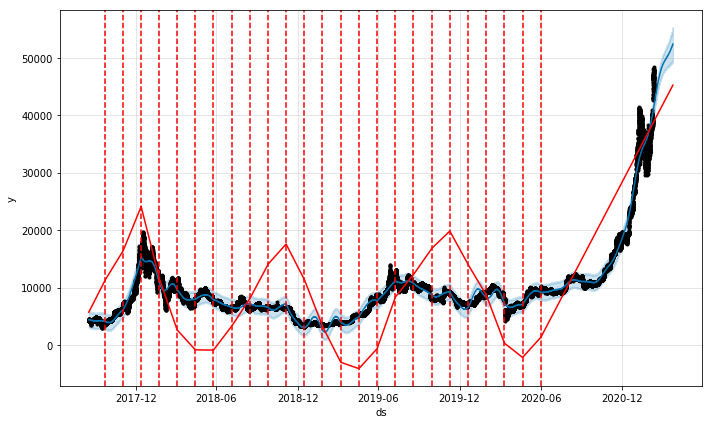

In [21]:
# plot forecast as usual
fig = model.plot(forecast_trends)

# add change points to plot; by default changepoints are only inferred for the first 80% of data to avoid overfitting,
# but this can be changed by using the changepoint_range argument of the model
a = add_changepoints_to_plot(fig.gca(), model, forecast_trends)

In [22]:
# print datetime of detected changepoints 
display(model.changepoints)

984     2017-09-22 05:00:00
1968    2017-11-02 05:00:00
2952    2017-12-13 05:00:00
3936    2018-01-23 05:00:00
4919    2018-03-04 00:00:00
5903    2018-04-14 00:00:00
6887    2018-05-25 00:00:00
7871    2018-07-05 07:00:00
8855    2018-08-15 00:00:00
9839    2018-09-25 00:00:00
10823   2018-11-05 00:00:00
11807   2018-12-16 00:00:00
12790   2019-01-25 23:00:00
13774   2019-03-07 23:00:00
14758   2019-04-17 23:00:00
15742   2019-05-28 23:00:00
16726   2019-07-08 23:00:00
17710   2019-08-18 23:00:00
18694   2019-09-28 23:00:00
19678   2019-11-08 23:00:00
20661   2019-12-19 22:00:00
21645   2020-01-29 22:00:00
22629   2020-03-10 22:00:00
23613   2020-04-20 22:00:00
24597   2020-05-31 22:00:00
Name: ds, dtype: datetime64[ns]

# This is Where The New Code Begins

### Modeling holiday effects in the Prophet model

To model the impact of holidays or other recurring events, you can use the Prophet's holiday function. In this exercise, we will use Prophet's built-in collection of country-specific holidays, and model how they impact the price of bitcoin.

In [23]:
# Create a new Prophet model
model_with_holidays = Prophet()

# Add the built-in US holidays to the model
model_with_holidays.add_country_holidays(country_name='US')

# Fit model
model_with_holidays.fit(df)

In [24]:
# Check what holidays are included
model_with_holidays.train_holiday_names

0                  New Year's Day
1       New Year's Day (Observed)
2      Martin Luther King Jr. Day
3           Washington's Birthday
4                    Memorial Day
5                Independence Day
6                       Labor Day
7                    Columbus Day
8                    Veterans Day
9         Veterans Day (Observed)
10                   Thanksgiving
11                  Christmas Day
12    Independence Day (Observed)
13       Christmas Day (Observed)
dtype: object

In [25]:
# Create a dataframe to hold predictions as far as 1000 hours (approx 40 days),
# using `make_future_dataframe`.
future_trends = model_with_holidays.make_future_dataframe(periods=1000, freq='H')
future_trends.tail(5)

ds
31743 2021-03-25 17:00:00
31744 2021-03-25 18:00:00
31745 2021-03-25 19:00:00
31746 2021-03-25 20:00:00
31747 2021-03-25 21:00:00

In [26]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends_with_holidays = model_with_holidays.predict(future_trends)

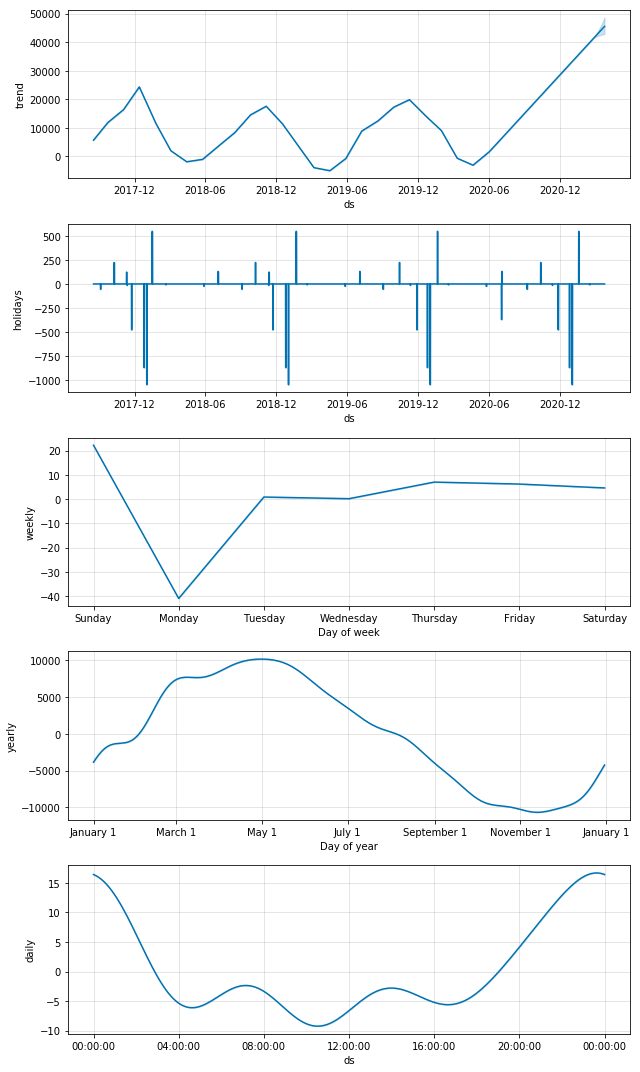

In [27]:
# Plot trend components - in addition to the weekly/yearly/daily trend, there's now also a plot for holiday effects
figures_with_holidays = model_with_holidays.plot_components(forecast_trends_with_holidays)